## Import Libraries

In [132]:
import pandas as pd
import re 
import numpy as np

## load the data

In [133]:
df = pd.read_csv("scraped_data.csv")

In [134]:
df

,Category,Product Name,Price,Sold,Rating,Reviews,Image
0,home,Portable Fruit Juice Blenders Summer Personal ...,MAD102.64,4.4 7251 Reviews ౹ 10 000+ sold,4.4,7251 Reviews,NaN
1,home,5/8ml Portable Mini Refillable Perfume Bottle ...,MAD5.71,4.9 16 Reviews ౹ 96 sold,4.9,16 Reviews,https://ae01.alicdn.com/kf/Sbd3764fd4bd445d887...
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,MAD86.16,4.3 369 Reviews ౹ 4 000+ sold,4.3,369 Reviews,NaN
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,MAD213.33,4.4 319 Reviews ౹ 3 000+ sold,4.4,319 Reviews,NaN
4,home,Newest Honeycomb Kitchen Sink Household Things...,MAD2 511.46,14 sold,NaN,NaN,NaN
...,...,...,...,...,...,...,...
81519,electronic,K56 Pro Smart Watch 1.39 Inch Men Women BT Cal...,MAD229.22,4.9 11 Reviews ౹ 39 sold,4.9,11 Reviews,https://ae01.alicdn.com/kf/Sea262793c4d84cf880...
81520,electronic,DT4 Mate Women Smart Watch Men Compass NFC Blu...,MAD218.04,5.0 1 Review ౹ 16 sold,5.0,1 Review,https://ae01.alicdn.com/kf/Se28cb36e5180405bbb...
81521,electronic,LIGE Military Men Smartwatch AMOLED HD Bluetoo...,MAD363.59,1 sold,NaN,NaN,https://ae01.alicdn.com/kf/S13c9ea6c41c2472b8b...
81522,electronic,SKMEI LED Digital Sports Watches Men Stainless...,MAD65.56,4.3 3 Reviews ౹ 16 sold,4.3,3 Reviews,NaN


## Data Preprocessing


In [135]:
# Dropping unnecessary columns
column_to_drop = 'Image'
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])


In [136]:
# Dropping duplicate rows based on 'Product Name'
df.drop_duplicates(subset='Product Name', inplace=True)


In [137]:
# Ensure 'Sold' column is treated as strings
df['Sold'] = df['Sold'].astype(str)

# Extract and convert the number of sold items
df['Sold'] = df['Sold'].apply(lambda x: re.search(r'౹\s*([\d\s]+)\s*\+', x).group(1).replace(' ', '') if pd.notna(x) and re.search(r'౹\s*([\d\s]+)\s*\+', x) else 0).astype(int)

# If 'Sold' column is still NaN (for cases like '14 sold'), extract the number
df['Sold'] = df['Sold'].combine_first(df['Sold'].astype(str).apply(lambda x: re.search(r'(\d+)', x).group(1) if pd.notna(x) and re.search(r'(\d+)', x) else 0).astype(int))


In [138]:
zero_sold_count = (df['Sold'] == 0).sum()
zero_sold_count

22608

In [139]:
# Converting 'Sold' to binary 
df['Sold'] = np.where(df['Sold'] == 0, 0, 1)

In [140]:
# Clean 'Price' column
df['Price'] = df['Price'].str.replace('MAD', '').str.replace(',', '').str.replace(' ', '').astype(float)

In [141]:
# Extract numeric values from 'Reviews' 
df['Reviews'] = df['Reviews'].str.replace(' Reviews', '').astype(str)


In [142]:
# Extract numeric values from 'Reviews' and 'Rating'

# Convert 'Rating' to numeric
df['Rating'] = df['Rating'].str.extract('(\d+\.?\d*)').astype(float)

# Convert 'Reviews' to numeric 
df['Reviews'] = df['Reviews'].str.extract('(\d+\.?\d*)').astype(float)

# Check the updated data types
df.dtypes

Category         object
Product Name     object
Price           float64
Sold              int32
Rating          float64
Reviews         float64
dtype: object

In [143]:
df['Rating_Per_Review'] = df['Rating'] / df['Reviews']
df = df.drop(['Rating', 'Reviews'], axis=1)


In [144]:
df= df.dropna(subset=['Category', 'Product Name', 'Price', 'Sold', 'Rating_Per_Review'])

In [145]:
df

,Category,Product Name,Price,Sold,Rating_Per_Review
0,home,Portable Fruit Juice Blenders Summer Personal ...,102.64,1,0.000607
1,home,5/8ml Portable Mini Refillable Perfume Bottle ...,5.71,0,0.306250
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,86.16,1,0.011653
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,213.33,1,0.013793
6,home,1 PCS Portable 390ml Air Humidifier Aromathera...,68.98,1,0.009871
...,...,...,...,...,...
81517,electronic,KT67 Smart Watch Women Bracelet Blood Pressure...,145.47,0,5.000000
81518,electronic,Smart Watch C20 PRO 1.83 Inch Men Music BT Cal...,181.84,1,0.021030
81519,electronic,K56 Pro Smart Watch 1.39 Inch Men Women BT Cal...,229.22,0,0.445455
81520,electronic,DT4 Mate Women Smart Watch Men Compass NFC Blu...,218.04,0,5.000000


## Exploratory Data Analysis (EDA)


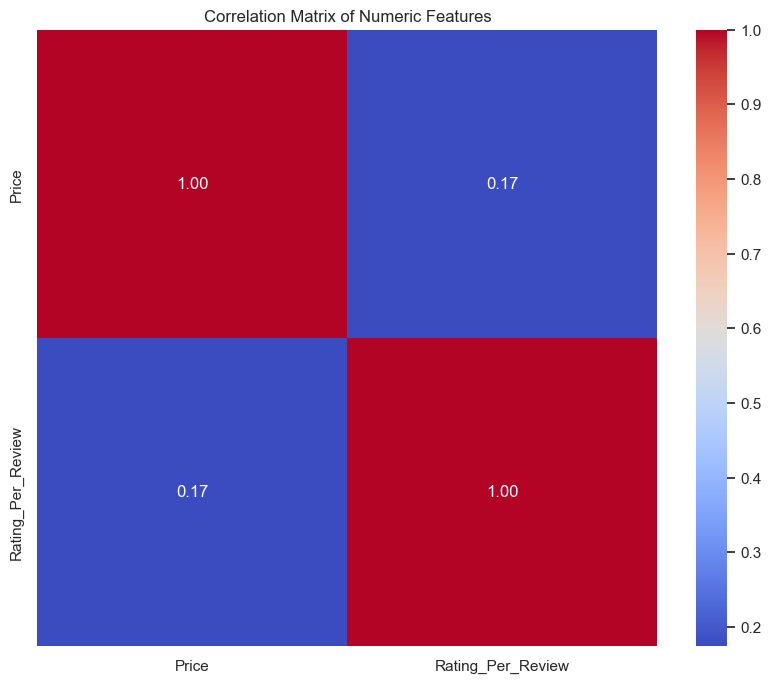

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualization of numeric features
# Heatmap for correlation matrix
numeric_columns = ['Price', 'Rating_Per_Review']
df_numeric = df[numeric_columns]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


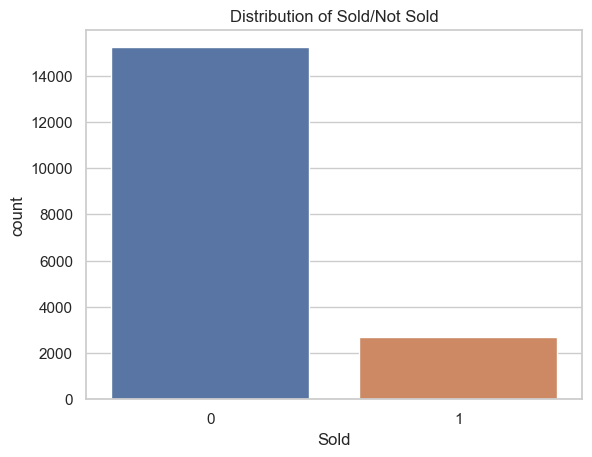

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Distribution of the target variable
sns.countplot(x='Sold', data=df)
plt.title('Distribution of Sold/Not Sold')
plt.show()


In [148]:
# Add 'ProductNameLength' column
df = df.copy()
df['ProductNameLength'] = df['Product Name'].apply(lambda x: len(str(x)))


In [149]:
sold_products = df[df['Sold'] == 1]
print("Rows where 'Sold' is equal to 1:")
sold_products

Rows where 'Sold' is equal to 1:


,Category,Product Name,Price,Sold,Rating_Per_Review,ProductNameLength
0,home,Portable Fruit Juice Blenders Summer Personal ...,102.64,1,0.000607,115
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,86.16,1,0.011653,115
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,213.33,1,0.013793,128
6,home,1 PCS Portable 390ml Air Humidifier Aromathera...,68.98,1,0.009871,122
7,home,Wireless Handheld Vacuum Cleaner Cordless Hand...,153.82,1,0.010656,122
...,...,...,...,...,...,...
81418,electronic,2023 Luxury Smart Watch Men Fitness Monitor Wa...,137.63,1,0.024590,128
81462,electronic,Military Smart Watch Men Waterproof IP68 BT Ca...,210.33,1,0.095745,127
81463,electronic,Original Fitness Smart Watch Heart Rate Monito...,63.78,1,0.031852,128
81486,electronic,NEW Ajazz AJ139PRO Wireless 2.4GHz + Wired Gam...,348.97,1,0.030189,92


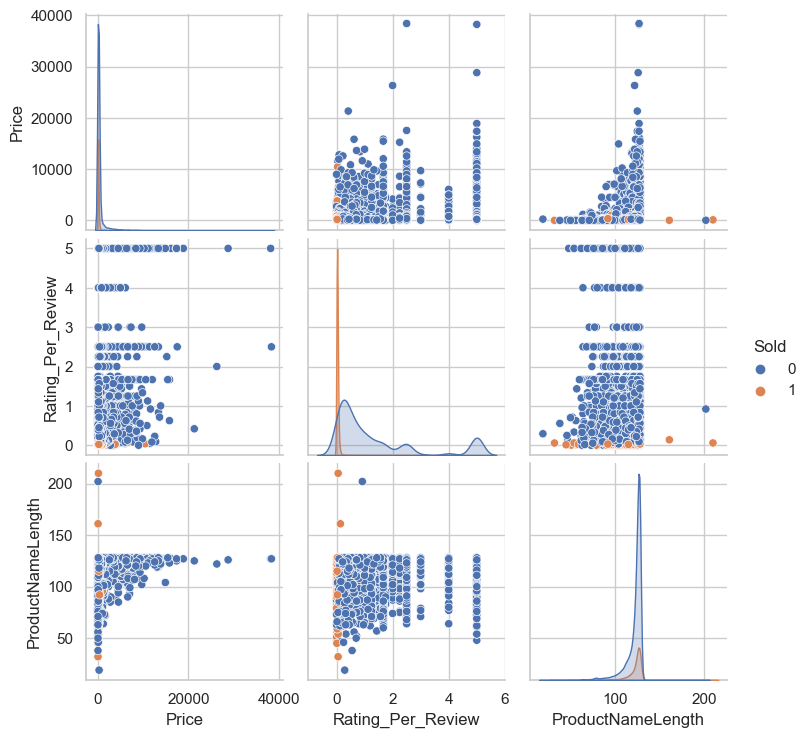

In [150]:
import seaborn as sns
sns.pairplot(df, hue='Sold')


In [151]:
import seaborn as sns


In [152]:
# Select only the numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

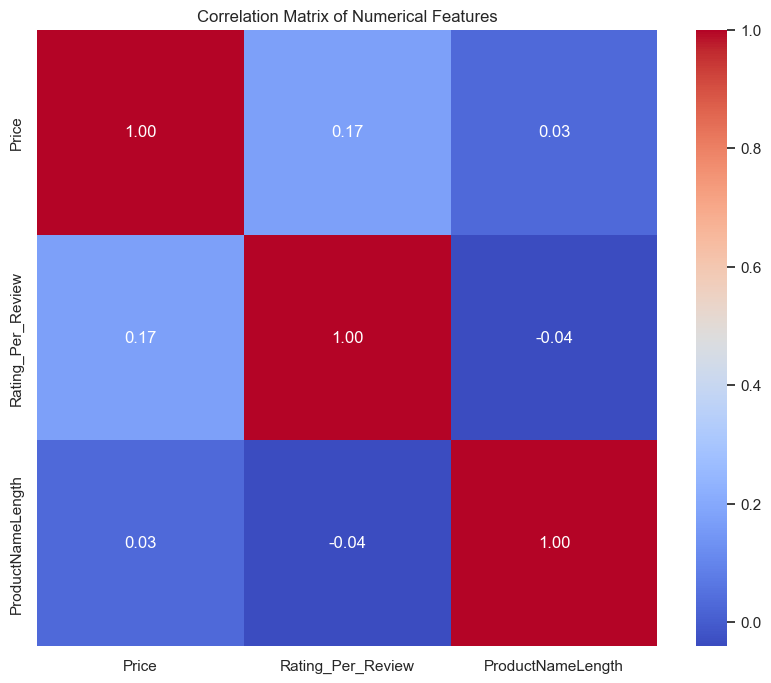

In [153]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Feature Engineering 

### Text Data Processing:


In [154]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# Tokenization and stemming for 'Product Name'

nltk.download('punkt')
df['Product Name'] = df['Product Name'].astype(str)

# Tokenization
df['Product Name Tokens'] = df['Product Name'].apply(lambda x: word_tokenize(x) if pd.notnull(x) else [])

# Stemming
stemmer = PorterStemmer()
df['Product Name Stemmed'] = df['Product Name Tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


df[['Product Name', 'Product Name Tokens', 'Product Name Stemmed']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Product Name,Product Name Tokens,Product Name Stemmed
0,Portable Fruit Juice Blenders Summer Personal ...,"[Portable, Fruit, Juice, Blenders, Summer, Per...","[portabl, fruit, juic, blender, summer, person..."
1,5/8ml Portable Mini Refillable Perfume Bottle ...,"[5/8ml, Portable, Mini, Refillable, Perfume, B...","[5/8ml, portabl, mini, refil, perfum, bottl, w..."
2,Car Vacuum Cleaner Portable Mini Dust Collecto...,"[Car, Vacuum, Cleaner, Portable, Mini, Dust, C...","[car, vacuum, cleaner, portabl, mini, dust, co..."
3,Vacuum Cleaner For Car Wireless Portable Vacuu...,"[Vacuum, Cleaner, For, Car, Wireless, Portable...","[vacuum, cleaner, for, car, wireless, portabl,..."
6,1 PCS Portable 390ml Air Humidifier Aromathera...,"[1, PCS, Portable, 390ml, Air, Humidifier, Aro...","[1, pc, portabl, 390ml, air, humidifi, aromath..."


### Most frequent words analysis


In [155]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# CountVectorizer for word frequency
all_stemmed_words = ' '.join(df['Product Name Stemmed'].explode().dropna())
vectorizer = CountVectorizer(stop_words='english') 
word_counts = vectorizer.fit_transform([all_stemmed_words])
# Create a DataFrame with words and their frequencies
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_counts.toarray().flatten()
})

# Select the top 20 to 30 most frequent words (excluding common English stop words)
most_frequent_words = word_frequency_df[
    ~word_frequency_df['Word'].isin(ENGLISH_STOP_WORDS)
].nlargest(30, 'Frequency')['Word'].tolist()

# Display or use the most frequent words
print("Most Frequent Words (Excluding Stop Words):")
print(most_frequent_words)

# Add columns for the most frequent words in the original DataFrame
for word in most_frequent_words:
    df[word] = df['Product Name Stemmed'].apply(lambda tokens: 1 if word in tokens else 0)


Most Frequent Words (Excluding Stop Words):
['phone', 'sport', 'garden', 'men', 'women', 'color', 'outdoor', 'light', 'case', 'fit', 'cloth', 'decor', 'set', 'eye', 'lens', 'waterproof', 'accessori', 'holder', 'cover', 'gym', 'mini', 'watch', 'new', 'contact', 'car', 'led', 'home', 'pro', 'beauti', 'tool']


In [156]:
columns_to_drop = ['Product Name Tokens', 'Product Name Stemmed', 'ProductNameLength']
df = df.drop(columns=columns_to_drop)


In [157]:
df.head(15)


,Category,Product Name,Price,Sold,Rating_Per_Review,phone,sport,garden,men,women,...,mini,watch,new,contact,car,led,home,pro,beauti,tool
0,home,Portable Fruit Juice Blenders Summer Personal ...,102.64,1,0.000607,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,home,5/8ml Portable Mini Refillable Perfume Bottle ...,5.71,0,0.306250,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,86.16,1,0.011653,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,213.33,1,0.013793,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6,home,1 PCS Portable 390ml Air Humidifier Aromathera...,68.98,1,0.009871,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
7,home,Wireless Handheld Vacuum Cleaner Cordless Hand...,153.82,1,0.010656,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
8,home,Mini Usb Desktop Office Quiet Air Freshener Ho...,17.19,0,5.000000,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
9,home,ABIR X8 Robot Vacuum Cleaner Laser System Mu...,2680.61,1,0.007122,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,home,Garden Arrangement Ornaments Plastic Plants Bo...,4.98,1,0.027879,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11,home,Polar Fleece Tub Chair Cover Spandex Club Armc...,116.28,1,0.036923,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

df['Sold'] = df['Sold'].astype(bool)


# Initialize an empty DataFrame for category columns
category_columns = pd.DataFrame()

# Iterate over unique values in the column containing category information
category_column_name = 'Category'  
for category in df[category_column_name].unique():
    # Create a binary column indicating the presence of the category
    category_columns[f'{category}'] = (df[category_column_name] == category).astype(int)

# Concatenate the new category columns and keywords features with the original DataFrame
df = pd.concat([df, category_columns], axis=1)
df

,Category,Product Name,Price,Sold,Rating_Per_Review,phone,sport,garden,men,women,...,accessories,gym,sports,camping,phones,computers,health,technology,beauty,electronic
0,home,Portable Fruit Juice Blenders Summer Personal ...,102.64,True,0.000607,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,home,5/8ml Portable Mini Refillable Perfume Bottle ...,5.71,False,0.306250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,86.16,True,0.011653,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,213.33,True,0.013793,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,home,1 PCS Portable 390ml Air Humidifier Aromathera...,68.98,True,0.009871,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81517,electronic,KT67 Smart Watch Women Bracelet Blood Pressure...,145.47,False,5.000000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
81518,electronic,Smart Watch C20 PRO 1.83 Inch Men Music BT Cal...,181.84,True,0.021030,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
81519,electronic,K56 Pro Smart Watch 1.39 Inch Men Women BT Cal...,229.22,False,0.445455,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
81520,electronic,DT4 Mate Women Smart Watch Men Compass NFC Blu...,218.04,False,5.000000,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [159]:
df.columns


Index(['Category', 'Product Name', 'Price', 'Sold', 'Rating_Per_Review',
       'phone', 'sport', 'garden', 'men', 'women', 'color', 'outdoor', 'light',
       'case', 'fit', 'cloth', 'decor', 'set', 'eye', 'lens', 'waterproof',
       'accessori', 'holder', 'cover', 'gym', 'mini', 'watch', 'new',
       'contact', 'car', 'led', 'home', 'pro', 'beauti', 'tool', 'home',
       'clothes', 'garden', 'accessories', 'gym ', 'sports', 'camping',
       'phones', 'computers', 'health', 'technology', 'beauty', 'electronic '],
      dtype='object')

In [160]:
df.dtypes

Category              object
Product Name          object
Price                float64
Sold                    bool
Rating_Per_Review    float64
phone                  int64
sport                  int64
garden                 int64
men                    int64
women                  int64
color                  int64
outdoor                int64
light                  int64
case                   int64
fit                    int64
cloth                  int64
decor                  int64
set                    int64
eye                    int64
lens                   int64
waterproof             int64
accessori              int64
holder                 int64
cover                  int64
gym                    int64
mini                   int64
watch                  int64
new                    int64
contact                int64
car                    int64
led                    int64
home                   int64
pro                    int64
beauti                 int64
tool          

### Feature Importance 

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Convert 'Sold' to boolean
df['Sold'] = df['Sold'].astype(bool)

# Specify the features for training the model
features = df.columns.difference(['Sold', 'Product Name', 'Category'])  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Sold'], test_size=0.2, random_state=42)



# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get the coefficients of the logistic regression model
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# Display the feature importance (coefficients)
print('Feature Importance:')
print(coefficients.sort_values(ascending=False))


Accuracy: 0.96
Feature Importance:
accessories           0.736612
computers             0.636152
beauty                0.596740
fit                   0.323673
phones                0.273552
car                   0.268759
pro                   0.259300
women                 0.217044
light                 0.200537
outdoor               0.174614
sport                 0.139154
camping               0.132113
cloth                 0.086849
home                  0.081611
holder                0.077153
gym                   0.060342
waterproof            0.036963
home                  0.034727
accessori             0.030211
new                   0.005840
Price                -0.000293
watch                -0.006527
set                  -0.023822
health               -0.028857
tool                 -0.031662
garden               -0.058096
eye                  -0.062098
electronic           -0.076883
clothes              -0.118433
sports               -0.134577
cover                -0.143394
beau

In [162]:
# Display the feature importance 
print('Feature Importance:')
print(coefficients.sort_values(ascending=False))

# Select relevant features
positive_features = coefficients[coefficients > 0].index
selected_features = positive_features

# Exclude features with negative importance values
negative_features = coefficients[coefficients < 0].index
excluded_features = negative_features

# Dropping low-impact features (close to 0)
low_impact_threshold = 0.1  
low_impact_features = coefficients[
    (coefficients >= -low_impact_threshold) & (coefficients <= low_impact_threshold)
].index
excluded_features = excluded_features.union(low_impact_features)

# Final set of selected features
selected_features = selected_features.difference(excluded_features)

# Display the final set of selected features
print('\nSelected Features:')
print(selected_features)


Feature Importance:
accessories           0.736612
computers             0.636152
beauty                0.596740
fit                   0.323673
phones                0.273552
car                   0.268759
pro                   0.259300
women                 0.217044
light                 0.200537
outdoor               0.174614
sport                 0.139154
camping               0.132113
cloth                 0.086849
home                  0.081611
holder                0.077153
gym                   0.060342
waterproof            0.036963
home                  0.034727
accessori             0.030211
new                   0.005840
Price                -0.000293
watch                -0.006527
set                  -0.023822
health               -0.028857
tool                 -0.031662
garden               -0.058096
eye                  -0.062098
electronic           -0.076883
clothes              -0.118433
sports               -0.134577
cover                -0.143394
beauti             

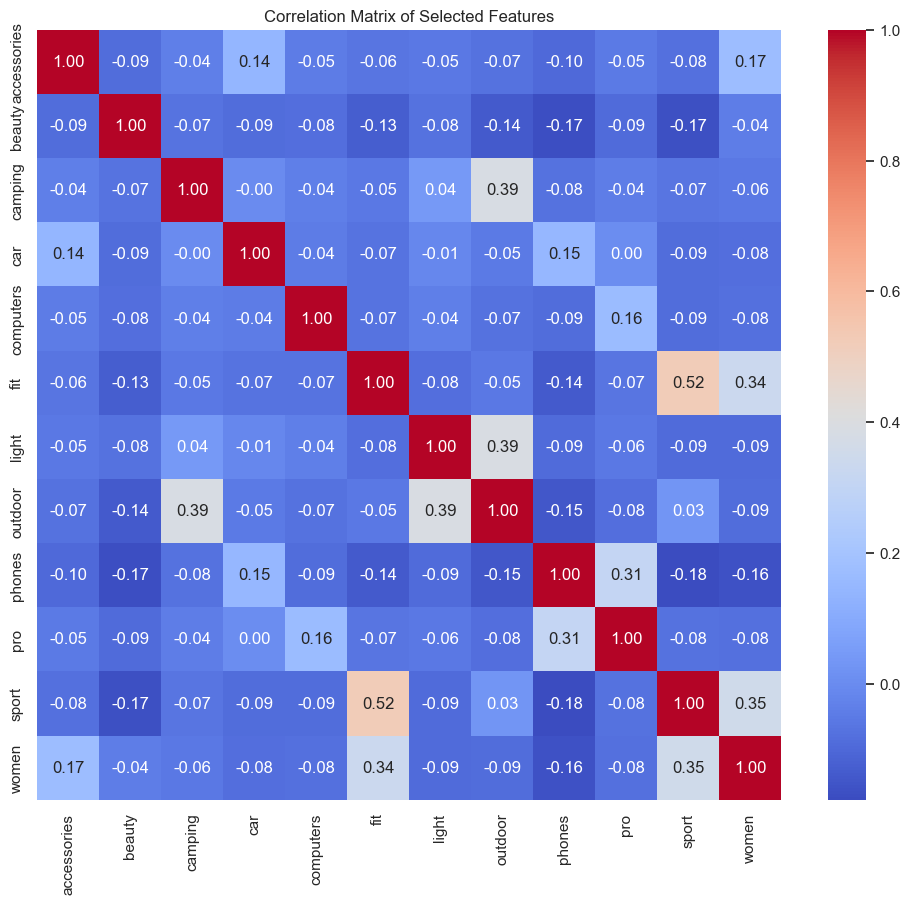

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features_data = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_features_data.corr()

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [164]:
selected_features_data = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_features_data.corr()

# Extract the correlation values as a DataFrame
correlation_values = correlation_matrix.unstack().sort_values()

# Filter out the diagonal and duplicate entries
correlation_values = correlation_values[correlation_values.index.get_level_values(0) != correlation_values.index.get_level_values(1)]

# Display the correlation values
print(correlation_values)


sport    phones    -0.177648
phones   sport     -0.177648
         beauty    -0.171377
beauty   phones    -0.171377
sport    beauty    -0.167447
                      ...   
camping  outdoor    0.387543
light    outdoor    0.390270
outdoor  light      0.390270
sport    fit        0.522625
fit      sport      0.522625
Length: 132, dtype: float64


In [165]:
threshold = 0.8
correlated_features = set()
corr_matrix = df[selected_features].corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)


set()


In [166]:
correlated_features = {'computers'}
df = df.drop(correlated_features, axis=1)


In [167]:
negative_importance_features = ['Price', 'holder', 'cloth', 'home', 'set', 'clothes', 'waterproof', 'mini', 'led', 'garden',
                                 'eye', 'color', 'sports', 'decor', 'cover', 'men', 'electronic ', 'lens', 'technology',
                                 'phone', 'garden', 'contact', 'gym', 'case', 'Rating_Per_Review']


corr_matrix_negative = df[negative_importance_features].corr()
print("Correlation Matrix for Negative Importance Features:")
print(corr_matrix_negative)


Correlation Matrix for Negative Importance Features:
                      Price    holder     cloth      home      home       set  \
Price              1.000000 -0.063868 -0.048699 -0.037559 -0.026640 -0.038717   
holder            -0.063868  1.000000 -0.073995 -0.049898 -0.029221 -0.063929   
cloth             -0.048699 -0.073995  1.000000 -0.058941 -0.030914  0.333257   
home              -0.037559 -0.049898 -0.058941  1.000000  0.505773 -0.037197   
home              -0.026640 -0.029221 -0.030914  0.505773  1.000000 -0.036138   
set               -0.038717 -0.063929  0.333257 -0.037197 -0.036138  1.000000   
clothes           -0.038966 -0.063032  0.737069 -0.054496 -0.040484  0.201507   
waterproof        -0.043603 -0.063028 -0.063683 -0.032151 -0.023441 -0.054726   
mini               0.186927 -0.020769 -0.062773  0.026995  0.040260 -0.049799   
led               -0.040933 -0.069208 -0.080129  0.029402 -0.008484 -0.069414   
garden            -0.063533 -0.088031 -0.070447  0.20235

In [168]:
# Set a threshold for high correlation
threshold_high_corr = 0.6

# Identify pairs of features with high correlation
highly_correlated_features = set()
for i in range(len(corr_matrix_negative.columns)):
    for j in range(i):
        if abs(corr_matrix_negative.iloc[i, j]) > threshold_high_corr:
            colname = corr_matrix_negative.columns[i]
            highly_correlated_features.add(colname)

print("\nHighly Correlated Features to Drop:")
print(highly_correlated_features)

# Drop the highly correlated features
df = df.drop(columns=highly_correlated_features)



Highly Correlated Features to Drop:
{'clothes', 'lens', 'case', 'garden', 'contact'}


In [169]:
df

,Category,Product Name,Price,Sold,Rating_Per_Review,phone,sport,men,women,color,...,home,accessories,gym,sports,camping,phones,health,technology,beauty,electronic
0,home,Portable Fruit Juice Blenders Summer Personal ...,102.64,True,0.000607,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,home,5/8ml Portable Mini Refillable Perfume Bottle ...,5.71,False,0.306250,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,home,Car Vacuum Cleaner Portable Mini Dust Collecto...,86.16,True,0.011653,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,home,Vacuum Cleaner For Car Wireless Portable Vacuu...,213.33,True,0.013793,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,home,1 PCS Portable 390ml Air Humidifier Aromathera...,68.98,True,0.009871,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81517,electronic,KT67 Smart Watch Women Bracelet Blood Pressure...,145.47,False,5.000000,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
81518,electronic,Smart Watch C20 PRO 1.83 Inch Men Music BT Cal...,181.84,True,0.021030,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
81519,electronic,K56 Pro Smart Watch 1.39 Inch Men Women BT Cal...,229.22,False,0.445455,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
81520,electronic,DT4 Mate Women Smart Watch Men Compass NFC Blu...,218.04,False,5.000000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [170]:
df.columns 

Index(['Category', 'Product Name', 'Price', 'Sold', 'Rating_Per_Review',
       'phone', 'sport', 'men', 'women', 'color', 'outdoor', 'light', 'fit',
       'cloth', 'decor', 'set', 'eye', 'waterproof', 'accessori', 'holder',
       'cover', 'gym', 'mini', 'watch', 'new', 'car', 'led', 'home', 'pro',
       'beauti', 'tool', 'home', 'accessories', 'gym ', 'sports', 'camping',
       'phones', 'health', 'technology', 'beauty', 'electronic '],
      dtype='object')

In [171]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Remove trailing whitespaces in column names
df.columns = df.columns.str.strip()

# Display the cleaned DataFrame
df = df.drop(columns=['gym'])


In [172]:
df.columns

Index(['Category', 'Product Name', 'Price', 'Sold', 'Rating_Per_Review',
       'phone', 'sport', 'men', 'women', 'color', 'outdoor', 'light', 'fit',
       'cloth', 'decor', 'set', 'eye', 'waterproof', 'accessori', 'holder',
       'cover', 'mini', 'watch', 'new', 'car', 'led', 'home', 'pro', 'beauti',
       'tool', 'accessories', 'sports', 'camping', 'phones', 'health',
       'technology', 'beauty', 'electronic'],
      dtype='object')

In [178]:
selected_features = ['sport', 'phone', 'mini', 'men', 'women', 'outdoor',
                     'color', 'light', 'fit', 'cloth', 'decor', 'set', 'waterproof', 
                     'eye', 'new', 'pro', 'accessori', 'watch', 'cover', 'home', 'led',
                     'holder', 'accessories', 'sports',
                     'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']
# Display correlation matrix for selected features
corr_matrix_selected = df[selected_features].corr()
print("Correlation Matrix for Selected Features:")
print(corr_matrix_selected)


Correlation Matrix for Selected Features:
                sport     phone      mini       men     women   outdoor  \
sport        1.000000 -0.138395 -0.102889  0.444706  0.353116  0.025457   
phone       -0.138395  1.000000 -0.006377 -0.114303 -0.132439 -0.125104   
mini        -0.102889 -0.006377  1.000000 -0.087001 -0.073727 -0.029320   
men          0.444706 -0.114303 -0.087001  1.000000  0.153033  0.016133   
women        0.353116 -0.132439 -0.073727  0.153033  1.000000 -0.090021   
outdoor      0.025457 -0.125104 -0.029320  0.016133 -0.090021  1.000000   
color       -0.079487 -0.090813 -0.065024 -0.059092 -0.018217 -0.079239   
light       -0.091324 -0.085503 -0.021495 -0.070996 -0.091610  0.390270   
fit          0.522625 -0.111053 -0.079429  0.232287  0.336989 -0.054971   
cloth        0.113369 -0.119258 -0.062773  0.152908  0.181178 -0.058720   
decor       -0.121421 -0.099402 -0.018117 -0.099941 -0.102016  0.295983   
set          0.178988 -0.104795 -0.049799  0.129010  0.131

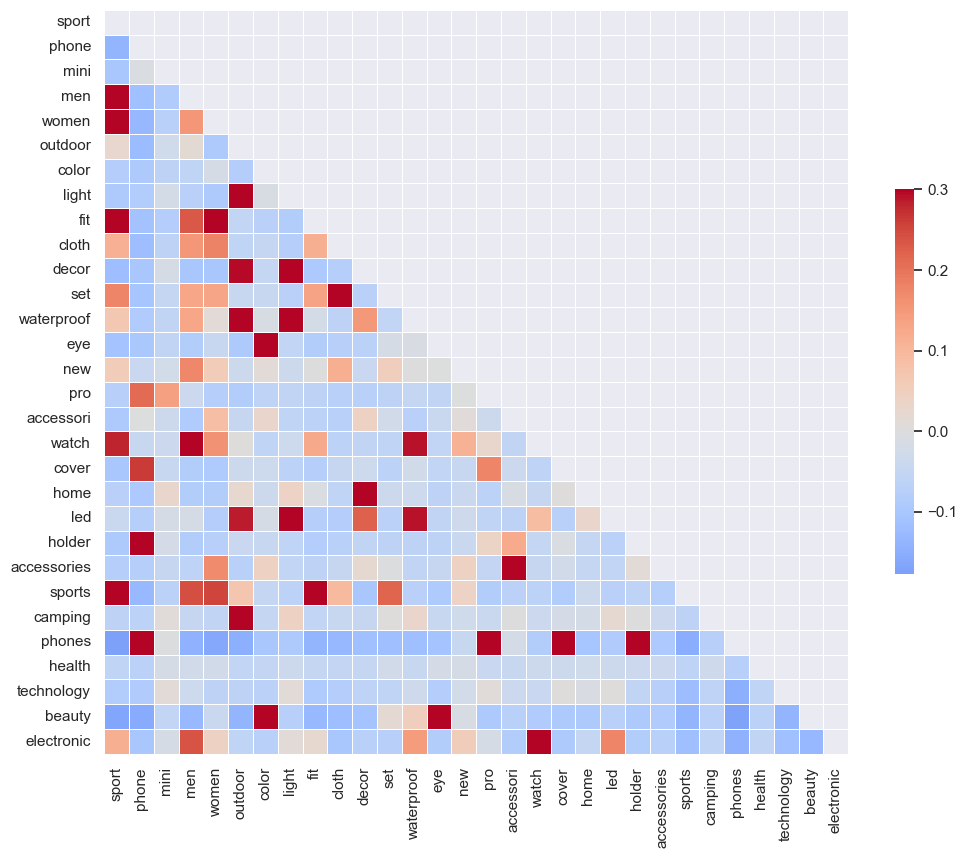

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="dark")

# Create a correlation matrix for selected features
corr_matrix_selected = df[selected_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_selected, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_selected, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()


## Model Building

### Logistic Regression

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'men', 'women', 'outdoor',
                     'color', 'light', 'fit', 'cloth', 'decor', 'set', 'waterproof', 
                     'eye', 'new', 'pro', 'accessori', 'watch', 'cover', 'home', 'led',
                     'holder', 'accessories', 'sports',
                     'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Accuracy: 0.8475

Confusion Matrix:
[[3014   34]
 [ 512   21]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92      3048
        True       0.38      0.04      0.07       533

    accuracy                           0.85      3581
   macro avg       0.62      0.51      0.49      3581
weighted avg       0.78      0.85      0.79      3581



In [181]:
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Save the DataFrame to a CSV file
X_train_df.to_csv('X_train.csv', index=False)

## Feature Importance:

In [186]:
# Get feature coefficients
feature_coeffs = pd.DataFrame(list(zip(X.columns, model.coef_[0])), columns=['Feature', 'Coefficient'])

# Sort features by their absolute coefficients
feature_coeffs['Abs_Coefficient'] = feature_coeffs['Coefficient'].abs()
feature_coeffs = feature_coeffs.sort_values(by='Abs_Coefficient', ascending=False)

# Print or visualize the top features
print("Top Features:")
print(feature_coeffs.head())

Top Features:
        Feature  Coefficient  Abs_Coefficient
22  accessories     0.502049         0.502049
25       phones     0.423297         0.423297
28       beauty     0.418233         0.418233
24      camping     0.164411         0.164411
13          eye    -0.151575         0.151575


In [45]:
# Calculate the sum of absolute coefficients
#sum_abs_coefficients = feature_coeffs['Abs_Coefficient'].sum()

# Calculate the percentage contribution of Rating_Per_Review
#percentage_contribution = (feature_coeffs[feature_coeffs['Feature'] == 'Rating_Per_Review']['Abs_Coefficient'] / sum_abs_coefficients) * 100

#print(f"Percentage Contribution of Rating_Per_Review: {percentage_contribution.values[0]:.2f}%")

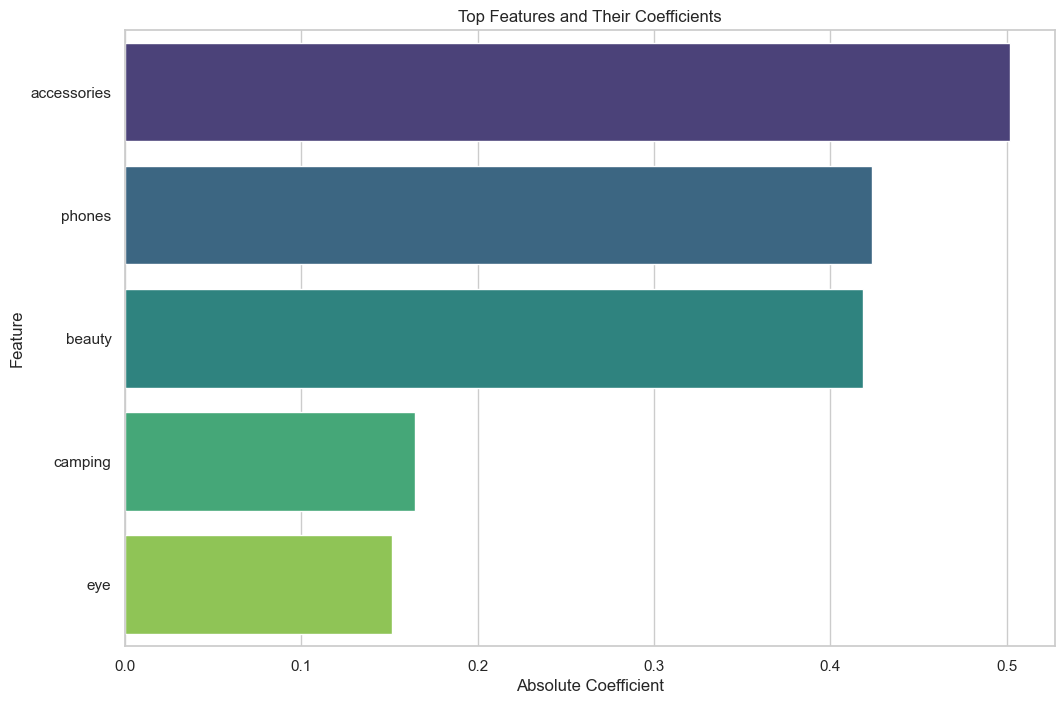

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_coeffs.head(), palette="viridis")

plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top Features and Their Coefficients')

plt.show()


In [196]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize logistic regression model
model = LogisticRegression(random_state=42)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new model with the best hyperparameters
best_model = LogisticRegression(random_state=42, **best_params)
best_model.fit(X_train_scaled, y_train)


Best Hyperparameters: {'C': 0.001}


LogisticRegression(C=0.001, random_state=42)

In [212]:
# Get predicted probabilities
y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]


threshold = 0.3
y_pred_threshold = (y_prob_best > threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
classification_rep_threshold = classification_report(y_test, y_pred_threshold)

# Print the results
print(f"Accuracy with Threshold Adjustment: {accuracy_threshold:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_threshold)
print("\nClassification Report:")
print(classification_rep_threshold)

Accuracy with Threshold Adjustment: 0.8472

Confusion Matrix:
[[3009   39]
 [ 508   25]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92      3048
        True       0.39      0.05      0.08       533

    accuracy                           0.85      3581
   macro avg       0.62      0.52      0.50      3581
weighted avg       0.79      0.85      0.79      3581



In [213]:
# Set class weights
class_weights = {0: 1, 1: 5} 

# Initialize logistic regression model with class weights
model_weighted = LogisticRegression(random_state=42, class_weight=class_weights)
model_weighted.fit(X_train_scaled, y_train)

# Make predictions on the test set with weighted logistic regression
y_pred_weighted = model_weighted.predict(X_test_scaled)

# Evaluate the weighted logistic regression model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
classification_rep_weighted = classification_report(y_test, y_pred_weighted)

print(f"Accuracy with Class Weights: {accuracy_weighted:.4f}")
print("\nConfusion Matrix (Class Weights):")
print(conf_matrix_weighted)
print("\nClassification Report (Class Weights):")
print(classification_rep_weighted)


Accuracy with Class Weights: 0.7344

Confusion Matrix (Class Weights):
[[2369  679]
 [ 272  261]]

Classification Report (Class Weights):
              precision    recall  f1-score   support

       False       0.90      0.78      0.83      3048
        True       0.28      0.49      0.35       533

    accuracy                           0.73      3581
   macro avg       0.59      0.63      0.59      3581
weighted avg       0.80      0.73      0.76      3581



In [215]:
X_train_df.columns

Index(['sport', 'phone', 'mini', 'men', 'women', 'outdoor', 'color', 'light',
       'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
       'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'accessories',
       'sports', 'camping', 'phones', 'health', 'technology', 'beauty',
       'electronic'],
      dtype='object')

## Tests

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'pc', 'men', 'women', 'comput', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'pant',
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

new_product_data = {
    'sport': 0,
    'phone': 0,
    'mini': 0,
    'pc': 0,
    'men': 0,
    'women': 1,
    'comput': 0,
    'outdoor': 1,
    'color': 1,
    'light': 0,
    'fit': 0,
    'cloth': 1,
    'decor': 0,
    'set': 0,
    'waterproof': 0,
    'eye': 0,
    'new': 0,
    'pro': 0,
    'accessori': 0,
    'watch': 0,
    'cover': 0,
    'home': 1,
    'led': 0,
    'holder': 0,
    'pant': 0,
    'Rating_Per_Review': 0.83,
    'accessories': 1,
    'sports': 0,
    'camping': 0,
    'phones': 0,
    'health': 0,
    'technology': 0,
    'beauty': 1,
    'electronic': 0
}

# Create a DataFrame for the new product data
new_product_df = pd.DataFrame([new_product_data])

# Ensure that the columns in X_new are in the same order as X_train
X_new_columns = X.columns
X_new = pd.DataFrame(new_product_df, columns=X_new_columns)

# Extract features and impute missing values
X_new_imputed = imputer.transform(X_new)

# Standardize features
new_product_scaled = scaler.transform(X_new_imputed)

# Make predictions for the new product
new_product_pred = model.predict(new_product_scaled)

# Print the prediction
print("Prediction for the new product:")
print("Winning Product" if new_product_pred[0] else "Not a Winning Product")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame with the preprocessed data
# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'pc', 'men', 'women', 'comput', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof' ,'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'pant', 
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Get user input for each feature
new_product_data = {}
for feature in X.columns:
    value = input(f"Enter value for '{feature}': ")
    new_product_data[feature] = float(value) if feature == 'Rating_Per_Review' else int(value)

# Create a DataFrame for the new product data
new_product_df = pd.DataFrame([new_product_data])

# Ensure that the columns in X_new are in the same order as X_train
X_new_columns = X.columns
X_new = pd.DataFrame(new_product_df, columns=X_new_columns)

# Extract features and impute missing values
X_new_imputed = imputer.transform(X_new)

# Standardize features
new_product_scaled = scaler.transform(X_new_imputed)

# Make predictions for the new product
new_product_pred = model.predict(new_product_scaled)

# Print the prediction
print("Prediction for the new product:")
print("Winning Product" if new_product_pred[0] else "Not a Winning Product")



In [ ]:
import joblib

# Save the trained model
model_filename = 'my_model.pkl'
joblib.dump(model, model_filename)

In [ ]:
# Convert X_train to a DataFrame
X_train_rf_df = pd.DataFrame(X_train, columns=X.columns)

# Save the DataFrame to a CSV file
X_train_rf_df.to_csv('X_train_rf.csv', index=False)

In [ ]:
X_train_rf_df.columns

## Random forrest 

In [217]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Assuming 'df' is your DataFrame with the preprocessed data
# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'men', 'women', 'outdoor',
                     'color', 'light', 'fit', 'cloth', 'decor', 'set', 'waterproof', 
                     'eye', 'new', 'pro', 'accessori', 'watch', 'cover', 'home', 'led',
                     'holder', 'accessories', 'sports',
                     'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and Random Forest model
rf_model = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.8422

Random Forest Confusion Matrix:
[[2984   64]
 [ 501   32]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.98      0.91      3048
        True       0.33      0.06      0.10       533

    accuracy                           0.84      3581
   macro avg       0.59      0.52      0.51      3581
weighted avg       0.78      0.84      0.79      3581



In [ ]:
!pip install imbalanced-learn

## Handle Class Imbalance:

In [218]:
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


## Hyperparameter Tuning:


### for linear regression

In [219]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_resampled, y_resampled)

best_params_lr = grid_search_lr.best_params_
best_model_lr = LogisticRegression(random_state=42, **best_params_lr)
best_model_lr.fit(X_resampled, y_resampled)

LogisticRegression(C=1, random_state=42)

## for random forrest

In [202]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_resampled, y_resampled)

best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(random_state=42, **best_params_rf)
best_model_rf.fit(X_resampled, y_resampled)


RandomForestClassifier(n_estimators=50, random_state=42)

## Evaluate the Improved Models:

In [220]:
# Logistic Regression
y_pred_lr = best_model_lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = best_model_rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Results:
              precision    recall  f1-score   support

       False       0.91      0.63      0.74      3048
        True       0.23      0.62      0.33       533

    accuracy                           0.63      3581
   macro avg       0.57      0.63      0.54      3581
weighted avg       0.80      0.63      0.68      3581


Random Forest Results:
              precision    recall  f1-score   support

       False       0.91      0.67      0.77      3048
        True       0.24      0.60      0.34       533

    accuracy                           0.66      3581
   macro avg       0.57      0.63      0.56      3581
weighted avg       0.81      0.66      0.71      3581



## Feature Scaling:

In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


## Feature Selection:

In [222]:
from sklearn.feature_selection import SelectFromModel

# Use the best random forest model from GridSearchCV
sfm = SelectFromModel(best_model_rf, threshold=0.05)
sfm.fit(X_resampled_scaled, y_resampled)

X_resampled_selected = sfm.transform(X_resampled_scaled)
X_test_selected = sfm.transform(X_test_scaled)


## Adjust Class Weights:

In [223]:
# Use best hyperparameters from GridSearchCV
best_model_lr_weighted = LogisticRegression(random_state=42, **best_params_lr, class_weight='balanced')
best_model_lr_weighted.fit(X_resampled_scaled, y_resampled)


LogisticRegression(C=1, class_weight='balanced', random_state=42)

## Logistic regression with best accuracy

In [237]:
# Make predictions on the test set
y_pred_lr_weighted = best_model_lr_weighted.predict(X_test_scaled)

# Evaluate the Logistic Regression model with weighted classes
accuracy_lr_weighted = accuracy_score(y_test, y_pred_lr_weighted)
conf_matrix_lr_weighted = confusion_matrix(y_test, y_pred_lr_weighted)
classification_rep_lr_weighted = classification_report(y_test, y_pred_lr_weighted)

# Print the results
print(f"Logistic Regression with Weighted Classes Accuracy: {accuracy_lr_weighted:.4f}")
print("\nLogistic Regression with Weighted Classes Confusion Matrix:")
print(conf_matrix_lr_weighted)
print("\nLogistic Regression with Weighted Classes Classification Report:")
print(classification_rep_lr_weighted)


Logistic Regression with Weighted Classes Accuracy: 0.6317

Logistic Regression with Weighted Classes Confusion Matrix:
[[1931 1117]
 [ 202  331]]

Logistic Regression with Weighted Classes Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.63      0.75      3048
        True       0.23      0.62      0.33       533

    accuracy                           0.63      3581
   macro avg       0.57      0.63      0.54      3581
weighted avg       0.80      0.63      0.68      3581



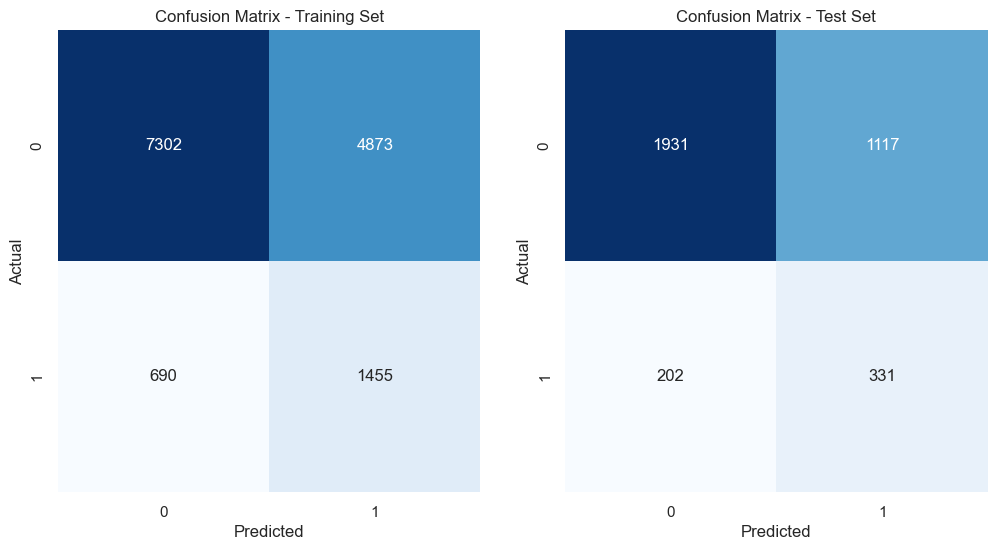

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the style of seaborn
sns.set(style="white")

# Plot confusion matrix for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, best_model_lr_weighted.predict(X_train_scaled)), annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_weighted), annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


Logistic Regression with Weighted Classes Accuracy: 0.6317

Logistic Regression with Weighted Classes Confusion Matrix:
[[1931 1117]
 [ 202  331]]

Logistic Regression with Weighted Classes Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.63      0.75      3048
        True       0.23      0.62      0.33       533

    accuracy                           0.63      3581
   macro avg       0.57      0.63      0.54      3581
weighted avg       0.80      0.63      0.68      3581



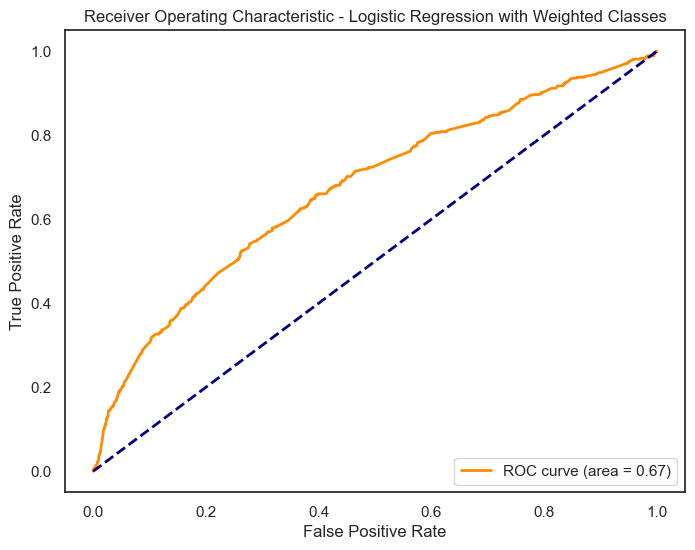

In [242]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set
y_prob_lr_weighted = best_model_lr_weighted.predict_proba(X_test_scaled)[:, 1]

# Evaluate the Logistic Regression model with weighted classes
accuracy_lr_weighted = accuracy_score(y_test, y_pred_lr_weighted)
conf_matrix_lr_weighted = confusion_matrix(y_test, y_pred_lr_weighted)
classification_rep_lr_weighted = classification_report(y_test, y_pred_lr_weighted)

# Print the results
print(f"Logistic Regression with Weighted Classes Accuracy: {accuracy_lr_weighted:.4f}")
print("\nLogistic Regression with Weighted Classes Confusion Matrix:")
print(conf_matrix_lr_weighted)
print("\nLogistic Regression with Weighted Classes Classification Report:")
print(classification_rep_lr_weighted)

# Plot the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_weighted)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression with Weighted Classes')
plt.legend(loc='lower right')
plt.show()


In [229]:
import joblib

# Specify the filename for the pickle file
filename = 'best_model_lr.pkl'

# Save the model to the pickle file
joblib.dump(best_model_lr_weighted, filename)

# Print a message indicating successful export
print(f"Model successfully saved as {filename}")


Model successfully saved as best_model_lr.pkl


## Random forest with best accuracy


In [226]:
# Make predictions on the test set
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.6576

Random Forest Confusion Matrix:
[[2035 1013]
 [ 213  320]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.67      0.77      3048
        True       0.24      0.60      0.34       533

    accuracy                           0.66      3581
   macro avg       0.57      0.63      0.56      3581
weighted avg       0.81      0.66      0.71      3581



C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


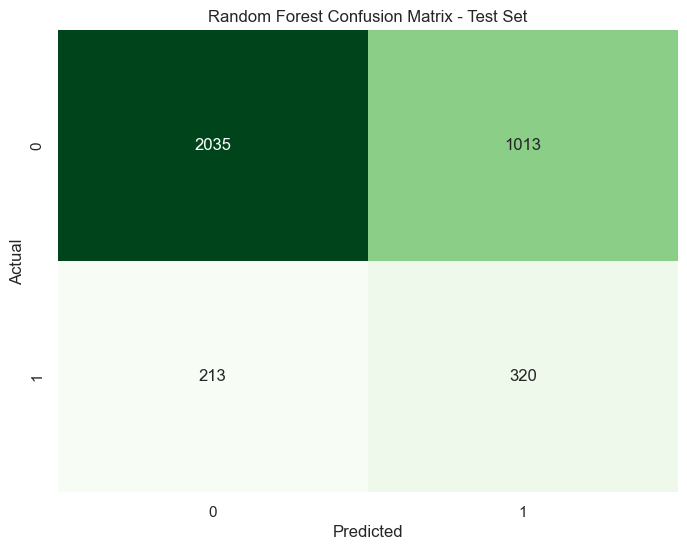

In [239]:
# Plot confusion matrix for Random Forest model on test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens", cbar=False)
plt.title('Random Forest Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


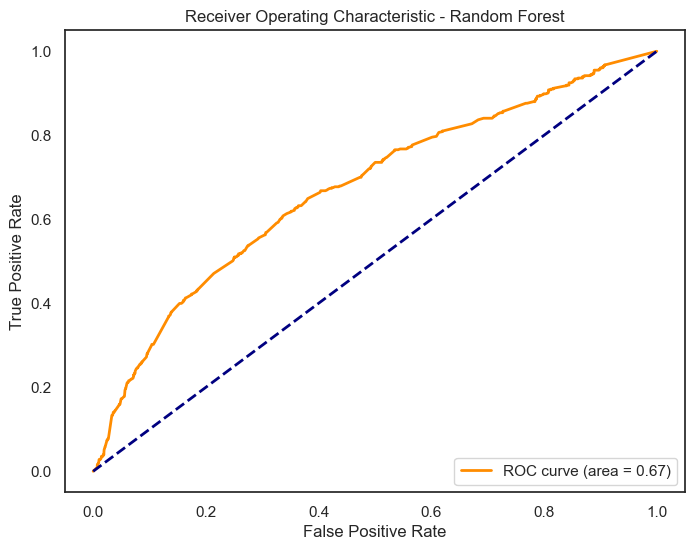

In [241]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the Random Forest model
y_prob_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [231]:
# Specify the filename for the Random Forest model pickle file
filename_rf = 'best_model_rf.pkl'

# Save the Random Forest model to the pickle file
joblib.dump(best_model_rf, filename_rf)

# Print a message indicating successful export
print(f"Random Forest Model successfully saved as {filename_rf}")


Random Forest Model successfully saved as best_model_rf.pkl


In [236]:
import pandas as pd

# Combine X_resampled and X_test_scaled back into a single dataframe
X_train_for_export = pd.concat([pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)], axis=0)

# Specify the filename for the CSV file
filename_x_train = 'X_train_for_models.csv'

# Save X_train to the CSV file
X_train_for_export.to_csv(filename_x_train, index=False)

# Print a message indicating successful export
print(f"X_train successfully saved as {filename_x_train}")


X_train successfully saved as X_train_for_models.csv


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'df' is your DataFrame with the preprocessed data
# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'pc', 'men', 'women', 'comput', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'pant', 
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and Random Forest model
rf_model = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Train the model
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame(list(zip(X.columns, rf_model.named_steps['randomforestclassifier'].feature_importances_)), 
                                   columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values(by='Imporstance', ascending=False)
print("Top Features by Importance:")
print(feature_importance.head())

# Hyperparameter Tuning
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train a new model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model with best hyperparameters
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the results
print(f"Random Forest Accuracy with Best Hyperparameters: {accuracy_best_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_best_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_best_rf)


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Assuming 'df' is your DataFrame with the preprocessed data
# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'pc', 'men', 'women', 'comput', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'pant', 
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Impute missing values with the mean of each column
X_imputed = imputer.fit_transform(X)

# Standardize features
X_scaled = scaler.fit_transform(X_imputed)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


In [ ]:
# Get user input for each feature
new_product_data_rf = {}
for feature in X.columns:
    value = input(f"Enter value for '{feature}': ")
    new_product_data_rf[feature] = float(value) if feature == 'Rating_Per_Review' else int(value)

# Create a DataFrame for the new product data
new_product_df_rf = pd.DataFrame([new_product_data_rf])

# Make predictions for the new product using the trained Random Forest model
new_product_pred_rf = rf_model.predict(new_product_df_rf)

# Print the Random Forest prediction
print("Random Forest Prediction for the new product:")
print("Winning Product" if new_product_pred_rf[0] else "Not a Winning Product")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame with the preprocessed data
# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'pc', 'men', 'women', 'comput', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder', 'pant', 'Rating_Per_Review',
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, _, _, _ = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y)

# Get user input for each feature
new_product_data = {}
for feature in X.columns:
    value = input(f"Enter value for '{feature}': ")
    new_product_data[feature] = float(value) if feature == 'Rating_Per_Review' else int(value)

# Create a DataFrame for the new product data
new_product_df = pd.DataFrame([new_product_data])

# Ensure that the columns in X_new are in the same order as X_train
X_new_columns = X.columns
X_new = pd.DataFrame(new_product_df, columns=X_new_columns)

# Extract features and impute missing values
X_new_imputed = imputer.transform(X_new)

# Standardize features
new_product_scaled = scaler.transform(X_new_imputed)

# Make predictions for the new product
new_product_pred = model.predict(new_product_scaled)

# Print the prediction
print("Prediction for the new product:")
print("Winning Product" if new_product_pred[0] else "Not a Winning Product")



## SVM & GradientBoosting & KNN

In [233]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'df' is your DataFrame with the preprocessed data

# Define features (X) and target variable (y)
X = df[['sport', 'phone', 'mini', 'men', 'women', 'outdoor', 'color', 'light',
        'fit', 'cloth', 'decor', 'set', 'waterproof', 'eye', 'new', 'pro',
        'accessori', 'watch', 'cover', 'home', 'led', 'holder',  
        'accessories', 'sports', 'camping', 'phones', 'health', 'technology', 'beauty', 'electronic']]

y = df['Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
svm_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models
svm_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"k-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")



SVM Accuracy: 0.8506
Gradient Boosting Accuracy: 0.8517
k-Nearest Neighbors Accuracy: 0.8350


In [234]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Classification Report:")
print(classification_rep_svm)

# Confusion matrix and classification report for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("\nGradient Boosting Confusion Matrix:")
print(conf_matrix_gb)
print("\nGradient Boosting Classification Report:")
print(classification_rep_gb)

# Confusion matrix and classification report for k-Nearest Neighbors
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("\nk-Nearest Neighbors Confusion Matrix:")
print(conf_matrix_knn)
print("\nk-Nearest Neighbors Classification Report:")
print(classification_rep_knn)


SVM Confusion Matrix:
[[3038   10]
 [ 525    8]]

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      3048
        True       0.44      0.02      0.03       533

    accuracy                           0.85      3581
   macro avg       0.65      0.51      0.47      3581
weighted avg       0.79      0.85      0.79      3581


Gradient Boosting Confusion Matrix:
[[3039    9]
 [ 522   11]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      3048
        True       0.55      0.02      0.04       533

    accuracy                           0.85      3581
   macro avg       0.70      0.51      0.48      3581
weighted avg       0.81      0.85      0.79      3581


k-Nearest Neighbors Confusion Matrix:
[[2901  147]
 [ 444   89]]

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support